# A simple model of a B-Scan 

Here we see how we can create a simple gprMax model of a B-Scan or otherwise known as a radargramm or simply a GPR scan. The process of designing the model is almost the same with the exception of specifying the *starting* locations of the transmitter and receiver and then the steps that gprMax will use in subsequent runs to move them in order to generate the simulated scan data one trace at the time. Obviously, the targets do not move!

__EXECUTE THE FOLLOWING CELL BEFORE ANY ELSE!!!__

In [21]:
run ../setup/preamble.ipynb

Consider another simple 2D model. We again assume that $z$-direction is infinite long and in the model it only has one cell width. So, let us consider an $x-y$ model of 0.6 metres by 0.3 metres and a spatial step of $\Delta x = \Delta y =$ 0.002 metres.

We initially setup the source and receiver close to the edge of the model __but not very close to the boundaries of the grid and at least 10 cells away__ and over a half space of a simple material like sand and we will set the relative permiitivty of it to $\epsilon_r$ = 3.5. We also will assume that there are no boundaries to this model for our waves and so absorbing boundaries are used by default around the edges of our numerical grid.

We then will specify a cylindrical target at a depth of about 0.1 metres from the interface having a radius of 0.01 metres.

Our scan will have 51 traces each separated by 0.008 metres. The first transmitter and receiver pair will be placed at (0.096, 0.256, 0) and (0.14, 0.256, 0) respectively.

We will run the model for a simulated time of 7 nanoseconds and use a Hertzian dipole source with a centre frequency of 2000 MHz and amplitutde 1. The antennna current waveform has the shape of a gaussian derivative.

We will call this model __simplesand.in__ and we will use the function __create_model__ below

In [2]:
# Use function create_model() to create the input model for gprMax. Provide a filename as input to the function
# with the extension '.in'. 

create_model('simplebscan.in')

Accordion(children=(GridBox(children=(HBox(children=(Label(value='Title: ', layout=Layout(width='20%')), Text(…

 Input file simplebscan.in was written successfully! 
 Input file simplebscan.in was written successfully! 


In [22]:
# View input file for gprMax

view_file('simplebscan.in')

#title: A simple B-Scan
#domain: 0.6 0.3 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 7e-9
#messages: y
#num_threads: 1 

#material: 3.5 0 1 0 sand

#waveform: gaussiandot 1 2000e6 mypulse
#hertzian_dipole: z 0.096 0.256 0 mypulse
#rx: 0.14 0.256 0

#src_steps: 0.008 0 0
#rx_steps: 0.008 0 0
#box: 0 0 0 0.6 0.25 0.002 sand
#cylinder: 0.3 0.15 0 0.3 0.15 0.002 0.01 pec
#box: 0 0 0 0.6 0.03 0.002 free_space

#geometry_view: 0 0 0 0.6 0.3 0.002 0.002 0.002 0.002 simplebscan n 



We run gprMax with the __-n NumberOfTraces__ flag to let it know how many runs we want!

In [26]:
!python -m gprMax simplebscan.in -n 4


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.5 (Big Smoke)

 Copyright (C) 2015-2020: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

Box from 0m, 0m, 0m, to 0.6m, 0.25m, 0.002m of material(s) sand created, dielectric smoothing is on.
Cylinder with face centres 0.3m, 0.15m, 0m and 0.3m, 0.15m, 0.002m, with radius 0.01m, of material(s) pec created, dielectric smoothing is off.
Box from 0m, 0m, 0m, to 0.6m, 0.03m, 0.002m of material(s) free_space created, dielectric smoothing is on.
Processing geometry related cmds: 100%|███████| 3/3 [00:00<00:00, 605.85cmds/s]

PML: formulation: HORIPML, order: 1, thickness: x0: 10, y0: 10, z0: 0, xmax: 10, ymax: 10, zmax: 0 cells
Building PML boundaries: 100%|██████████████████| 4/4 [00:00<00:00, 564.36it/s]

Building main grid: 100%|███████████████████████| 2/2 [00:00<00:00, 100.92it/s]

Materials:
    |                                 |                     |       | sigma |      | sigma*  | Dielectric 
 ID | Name                            | Type                | eps_r | [S/m] | mu_r | [Ohm/m] | smoothable 
----+---------------------------------+---------------------+-------+------

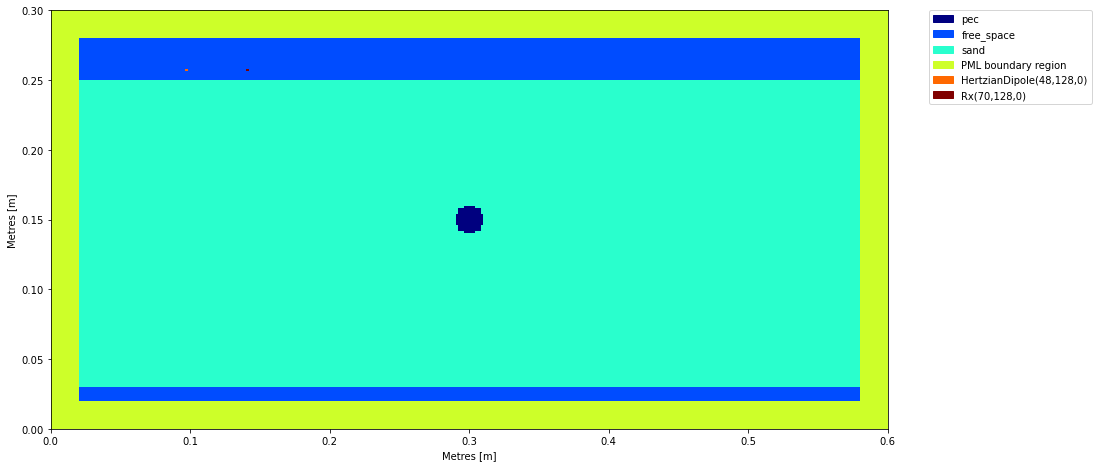

In [27]:
# View the 2D gprMax model to see if it is OK Remember that every model has a number at the end for each trace.

gprMax_model('simplebscan1.vti')

We can collect all the traces using a new function to read a B-scan but don't give the file extention!

In [28]:
# the filename will be the input file base neame with a ".out" extension 
Bscan, time, pos = gprMax_Bscan('simplebscan.out', 1, 'Ez')

We can plot the results using the Bscan plotting function

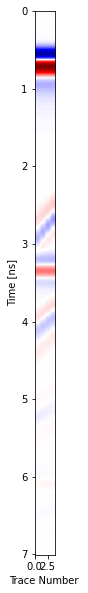

In [29]:
# Plot B-scan - plot_Bscan(bscan, time_vector, time_offset) We do not have to use the time_offset if it is 0

plot_Bscan(Bscan,time)

Finally, if we want to export this Bscan using the same file format (.dzt) as used by the GSSI radar system so we can be able to import it into the processing software we will use for dealing with real GPR data, we can use the following __gprMax_to_dzt__ function

In [8]:
# gprMax_to_dzt('fileName', rx_number, 'component', FrequencyMHz2000, Tx_Rx_separtion, AScan_step_size)
gprMax_to_dzt('simplebscan', 1, 'Ez', 2000, 0.08, 0.008)

Dzt file has been written!


In [18]:
%%writefile simplebscan.in
#title: A simple B-Scan
#domain: 0.6 0.3 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 7e-9
#messages: y
#num_threads: 1 

#material: 3.5 0 1 0 sand

#waveform: gaussiandot 1 2000e6 mypulse
#hertzian_dipole: z 0.096 0.256 0 mypulse
#rx: 0.14 0.256 0

#src_steps: 0.008 0 0
#rx_steps: 0.008 0 0
#box: 0 0 0 0.6 0.25 0.002 sand
#cylinder: 0.3 0.15 0 0.3 0.15 0.002 0.01 pec
#box: 0 0 0 0.6 0.03 0.002 free_space

#geometry_view: 0 0 0 0.6 0.3 0.002 0.002 0.002 0.002 simplebscan n 


Overwriting simplebscan.in
